In [1]:
import numpy as np # библиотека для работы с матрицами и массивами
import matplotlib.pyplot as plt # для отрисовки графика

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV




%matplotlib inline

In [2]:
iris = load_iris()
type (iris)

sklearn.utils._bunch.Bunch

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data.shape

(150, 4)

In [7]:
x = iris.data
y = iris.target

In [8]:
#Делим данные на тренировочное и тестовое множество:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(120, 4) (30, 4) (30,) (120,)


In [9]:
K_range = range(1, 11)
scores = {}
scores_list = []
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, Y_pred))

In [10]:
scores

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.9666666666666667,
 8: 1.0,
 9: 1.0,
 10: 1.0}

Text(0, 0.5, 'Acuracy')

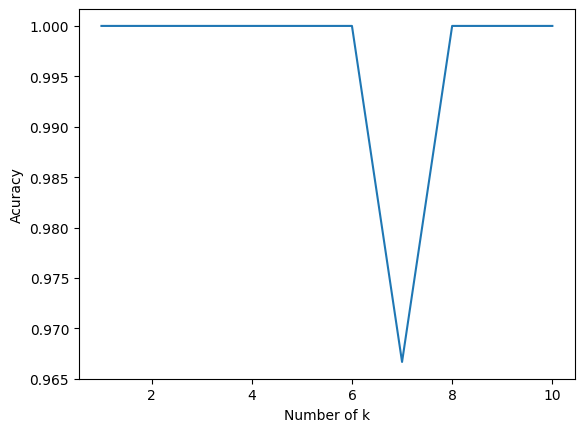

In [11]:
plt.plot(K_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Acuracy')

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)


KNeighborsClassifier(n_neighbors=3)

In [13]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}


In [14]:
X_new = [[3,4,5,2],
        [5,4,2,2,]]

In [15]:
Y_pred = knn.predict(X_new)

In [16]:
print (classes [Y_pred[0]])
print (classes [Y_pred[1]])

versicolor
setosa


In [17]:
#Создаем классификатор:

best_model = KNeighborsClassifier(
   n_neighbors=10, 
   weights='distance',
   algorithm='auto',
   leaf_size=30,
   metric='euclidean',
   metric_params=None,
   n_jobs=4
)

best_model.fit(X_train, Y_train)
predicted = best_model.predict(X_test)

print('Evaluation:\n', metrics.classification_report(Y_test, predicted))

Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
# Используем скользящий контроль для поиска лучших параметров: 

model_params = best_model.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = range(2, 3)
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, Y_train)
best_params = clf.best_params_

In [19]:
#Обучаем:

best_model.fit(X_train, Y_train)


KNeighborsClassifier(metric='euclidean', n_jobs=4, n_neighbors=10,
                     weights='distance')

In [20]:
#Оценка классификатора:

best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, Y_train)
predicted = best_model.predict(X_test)

In [21]:
print('Used params:', best_params)
print('Evaluation:\n', metrics.classification_report(Y_test, predicted))

Used params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': 4, 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
params = {"n_neighbors":np.arange(1, 150)}
K = KNeighborsClassifier() #реализация метода k-ближайших соседей. Здесь берется 5 соседей
grid = RandomizedSearchCV(K, params) 

In [23]:
grid.fit(X_train, Y_train) #обучение модели
predicted = grid.predict(X_test) #прогноз

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 638, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.4        0.89166667 0.40833333        nan 0.40833333 0.93333333
        nan 0.70833333 0.95833333 0.675     ]
  warnings.warn(


In [24]:
print('Used params:', grid.best_params_)
print('Evaluation:\n', metrics.classification_report(Y_test, predicted))

Used params: {'n_neighbors': 3}
Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# color = np.array(range(1000,1300), str) # массив с цветом, для удобства

In [26]:
# for number in range(1,151): # запись данных в созданный объект
#  train_data.response[number-1] = int(iris[number])
#  if train_data.response[number-1] == 0:
#   color[number-1] = "w"
#  if train_data.response[number-1] == 1:
#   color[number-1] = "k"

In [27]:
# color1 = np.array(range(10000,10075), str) 

In [28]:
# plt.scatter(X_test[number][0], X_test[number][1], c = color1[number], marker = "*", edgecolors ="k")